# 2. Earth’s energy budget

In [32]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Show plots in the notebook
%matplotlib inline

import netCDF4


In [33]:
ds  = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")


## 2.1 Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

Text(0.5, 1.0, 'The time-mean TOA longwave')

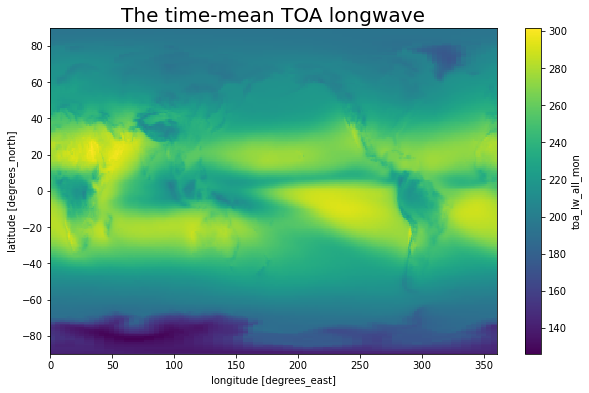

In [34]:
ds.toa_lw_all_mon.mean(dim='time').plot(figsize=(10,6))
plt.title('The time-mean TOA longwave',fontsize = 20)


Text(0.5, 1.0, 'The time-mean TOA shortwave')

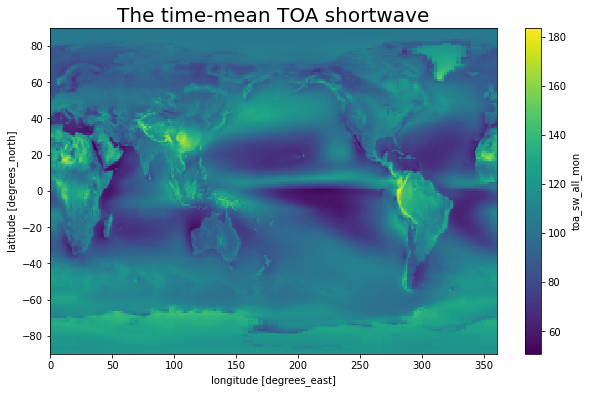

In [35]:
ds.toa_sw_all_mon.mean(dim='time').plot(figsize=(10,6))
plt.title('The time-mean TOA shortwave',fontsize = 20)

Text(0.5, 1.0, 'The time-mean solar radiation')

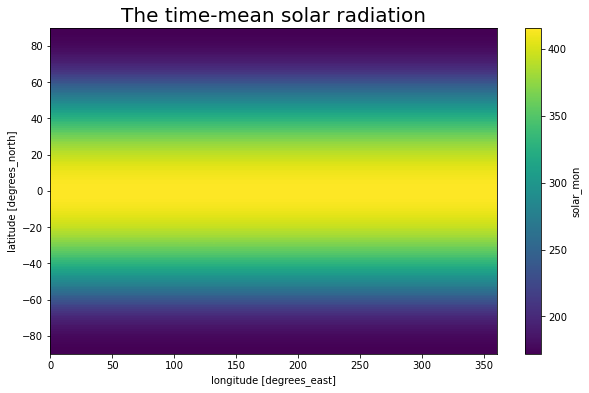

In [36]:
ds.solar_mon.mean(dim='time').plot(figsize=(10,6))
plt.title('The time-mean solar radiation',fontsize = 20)

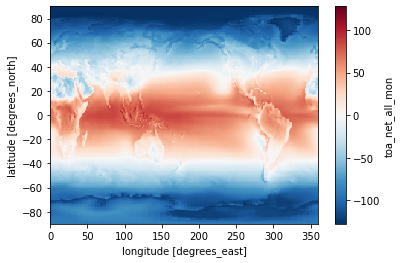

In [37]:
ds.toa_net_all_mon.mean('time').plot()

Text(0.5, 1.0, 'TOA net Flux ')

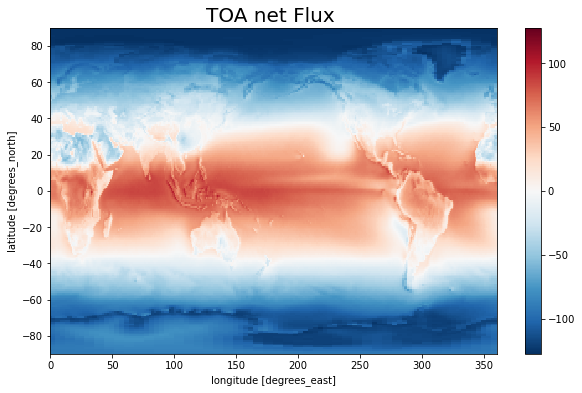

In [38]:
net_flux = ds.solar_mon-ds.toa_lw_all_mon-ds.toa_sw_all_mon#和上面的图看起来是一样的
net_flux.mean(dim='time').plot(figsize=(10,6))
plt.title('TOA net Flux ',fontsize = 20)

## 2.2 Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.

In [39]:
weights = np.cos(np.deg2rad(ds.lat))

in_solar_weighted = ds.solar_mon.weighted(weights)
toa_lw_weighted = ds.toa_lw_all_mon.weighted(weights)
toa_sw_weighted = ds.toa_sw_all_mon.weighted(weights)

insolar=in_solar_weighted.mean(dim=('lon', 'lat','time')).values
lw=toa_lw_weighted.mean(dim=('lon', 'lat','time')).values
sw=toa_sw_weighted.mean(dim=('lon', 'lat','time')).values

print(insolar,lw,sw)

340.28326598091286 240.2669337478465 99.13805276923081


## 2.3 Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units. 

Text(0, 0.5, 'Net radiation(W)')

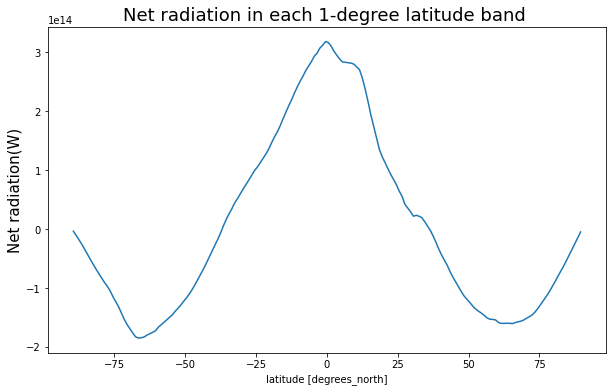

In [40]:
#龚国庆、左小幸向我解释了此题
R=6371.4e3

equator_s = 2*np.pi**2*R**2/180
equator_s_weighted= equator_s * weights

nf = net_flux.mean(dim=('lon','time'))

total_amount = nf * equator_s_weighted
total_amount.plot(figsize=(10,6))
plt.title('Net radiation in each 1-degree latitude band ',fontsize = 18)
plt.ylabel('Net radiation(W)',fontsize = 15)

## 2.4 Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as ≤25% and high cloud area as ≥75%. Your results should be 2D maps. 

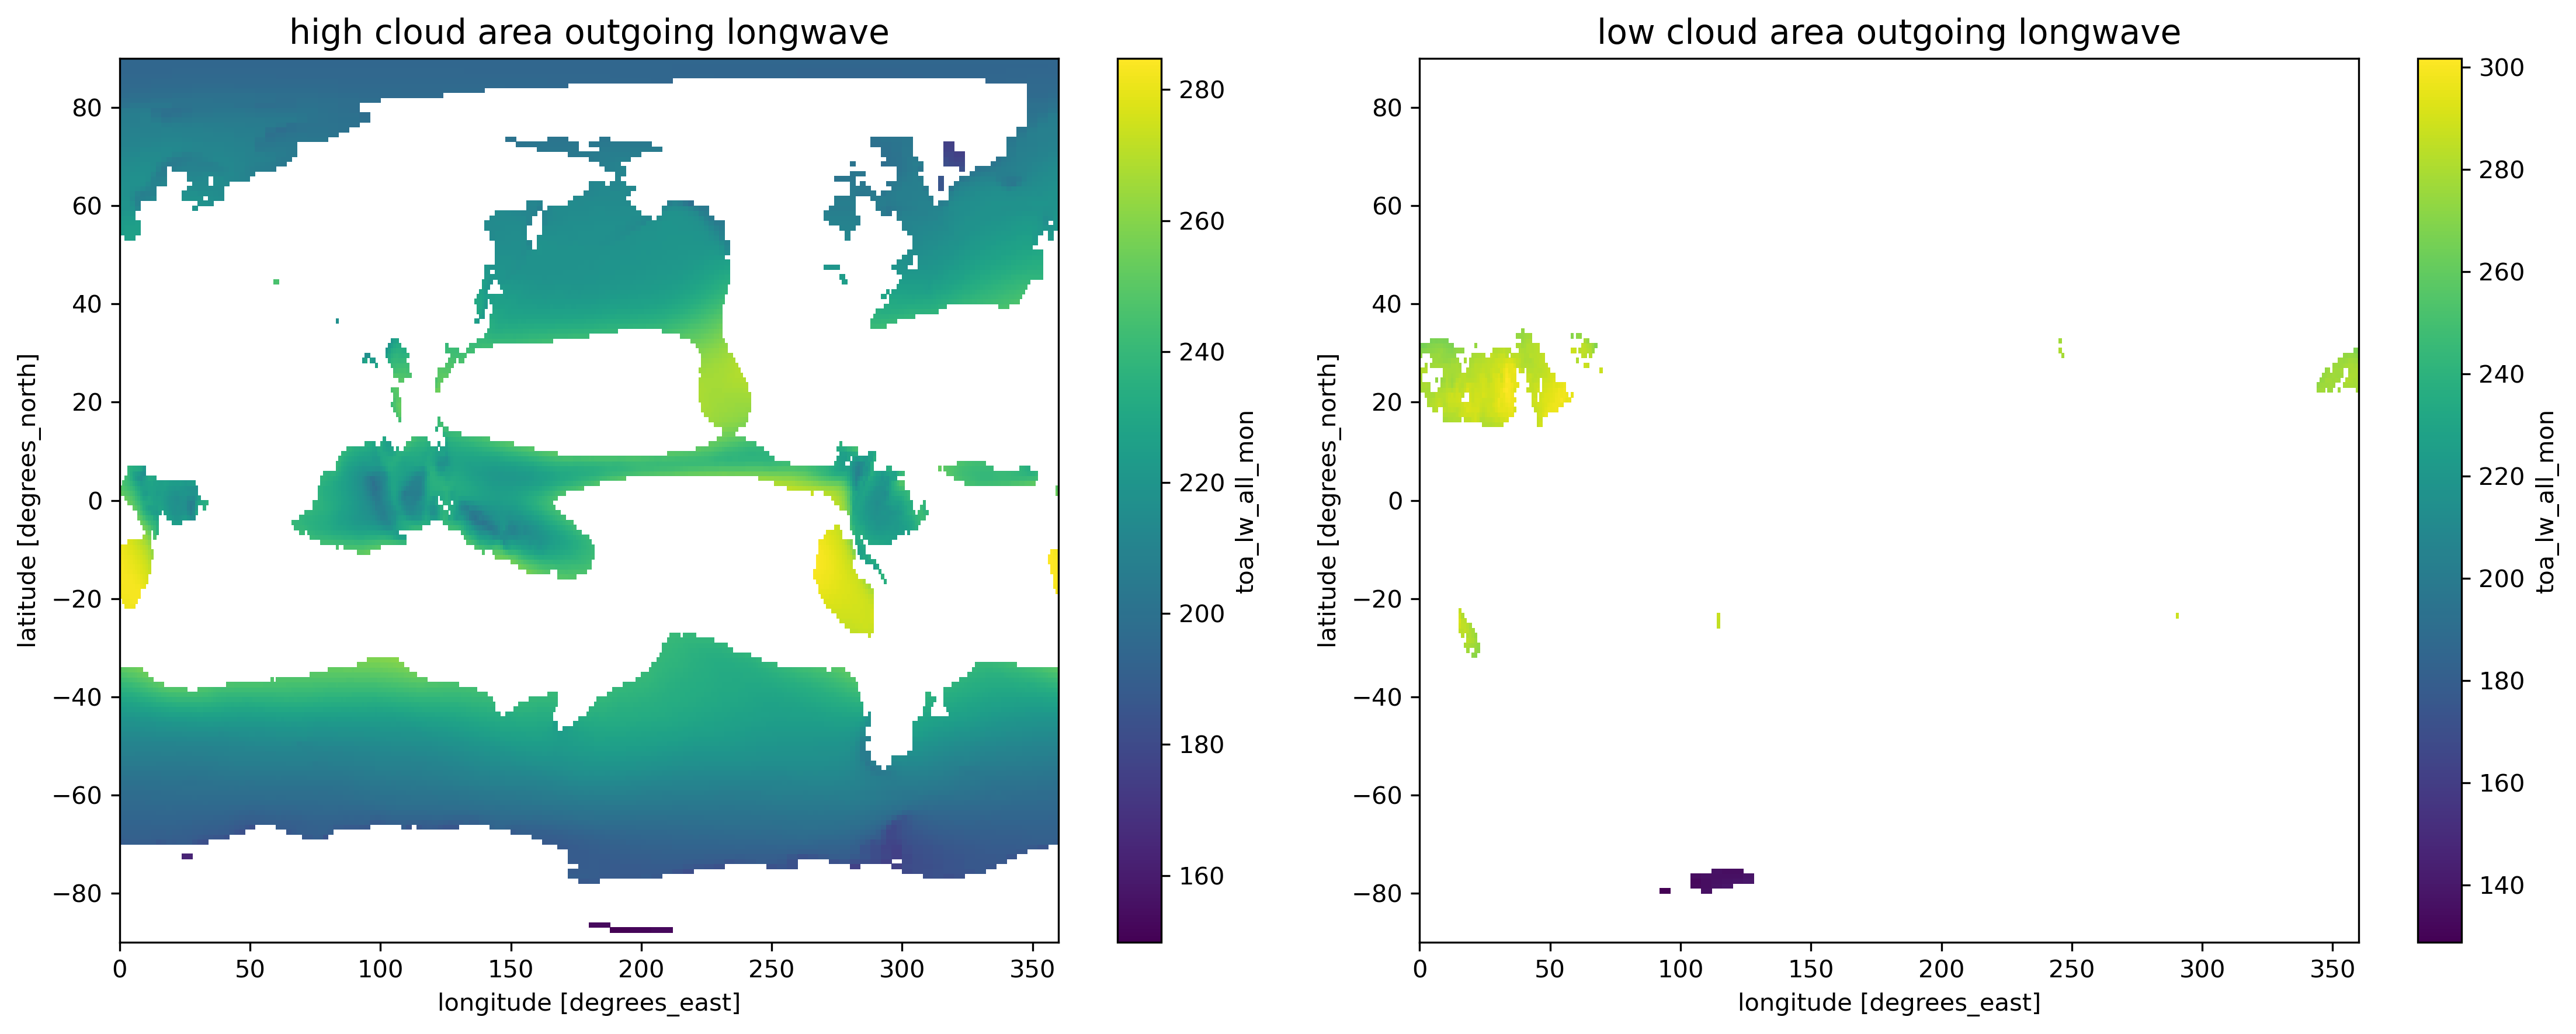

In [41]:
fig,axes = plt.subplots(1,2,figsize=(15,6),dpi=300)
cloud_map = ds.cldarea_total_daynight_mon.mean(dim='time')
longwave_r = ds.toa_lw_all_mon.mean(dim='time')
longwave_r.where(cloud_map >= 75).plot(ax=axes[0])
longwave_r.where(cloud_map <= 25).plot(ax=axes[1])

axes[0].set_title('high cloud area outgoing longwave',fontsize = 14)
axes[1].set_title('low cloud area outgoing longwave',fontsize = 14)

plt.tight_layout()

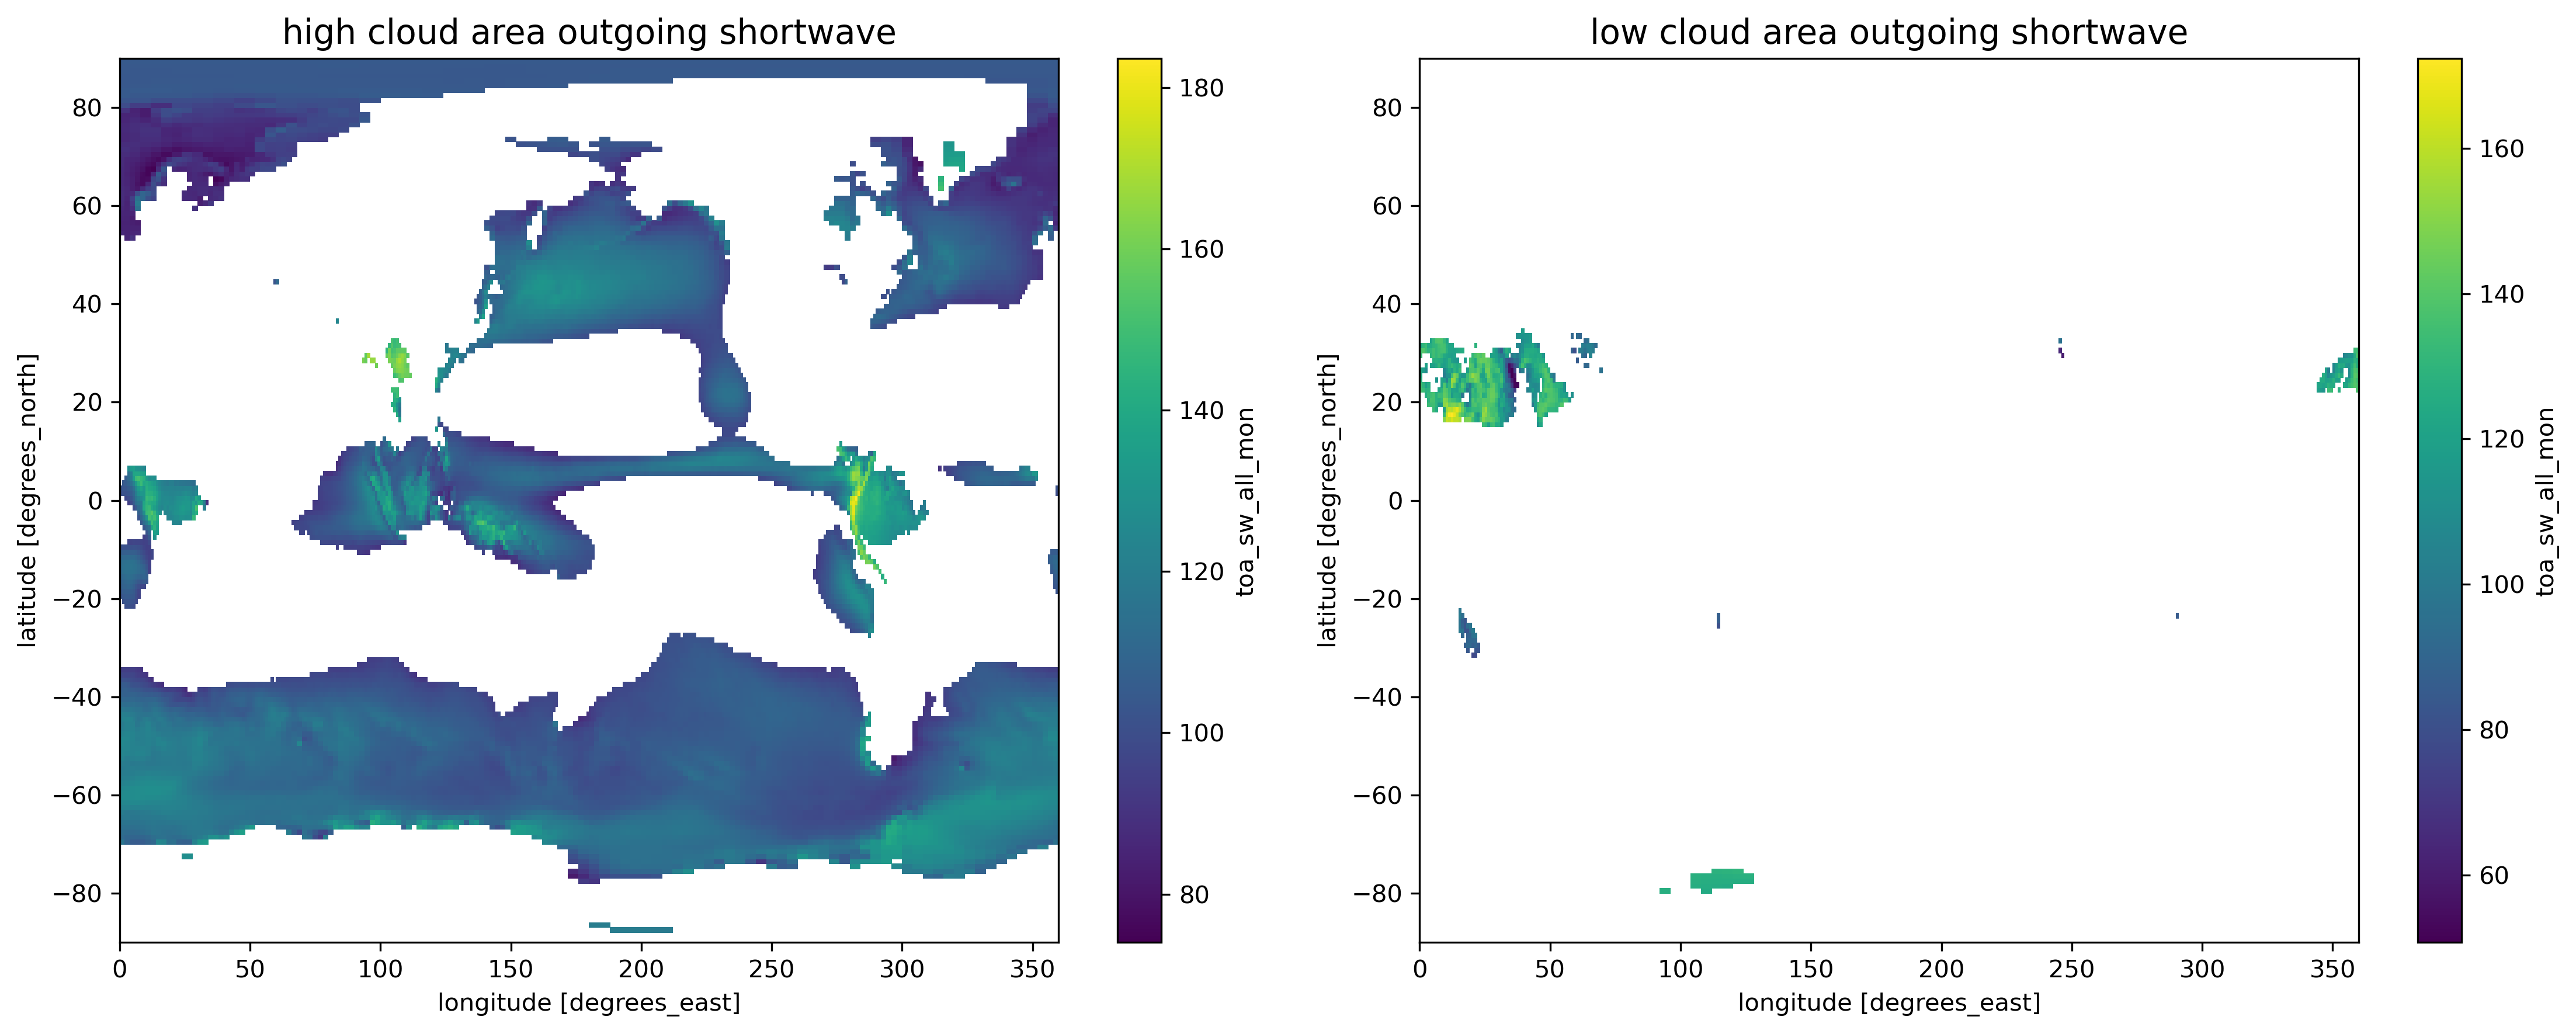

In [42]:
fig,axes = plt.subplots(1,2,figsize=(15,6),dpi=300)

shortwave_r = ds.toa_sw_all_mon.mean(dim='time')

shortwave_r.where(cloud_map >= 75).plot(ax=axes[0])
shortwave_r.where(cloud_map <= 25).plot(ax=axes[1])

axes[0].set_title('high cloud area outgoing shortwave',fontsize = 14)
axes[1].set_title('low cloud area outgoing shortwave',fontsize = 14)

plt.tight_layout()

## 2.5 Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation? 

In [43]:
HL=longwave_r.where(cloud_map >= 75)
LL=longwave_r.where(cloud_map <= 25)
print('high cloud longwave:',np.nanmean(HL),'(W/m2)')
print('low cloud longwave:',np.nanmean(LL),'(W/m2)')

HS=shortwave_r.where(cloud_map >= 75)
LS=shortwave_r.where(cloud_map <= 25)
print('high cloud shortwave:',np.nanmean(HS),'(W/m2)')
print('low cloud shortwave:',np.nanmean(LS),'(W/m2)')

high cloud longwave: 216.55675 (W/m2)
low cloud longwave: 270.10367 (W/m2)
high cloud shortwave: 108.09777 (W/m2)
low cloud shortwave: 122.65546 (W/m2)
